In [1]:
import sklearn.cluster
import scipy.cluster
import sklearn.datasets
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_context('poster')
sns.set_palette('Paired', 10)
sns.set_color_codes()

In [2]:
def benchmark_algorithm(dataset_sizes, cluster_function, function_args, function_kwds,
                        dataset_dimension=10, dataset_n_clusters=10, max_time=45, sample_size=2):

    # Initialize the result with NaNs so that any unfilled entries
    # will be considered NULL when we convert to a pandas dataframe at the end
    result = np.nan * np.ones((len(dataset_sizes), sample_size))
    for index, size in enumerate(dataset_sizes):
        for s in range(sample_size):
            # Utiliser sklearns make_blobs pour générer a random dataset with specified size
            # dimension and number of clusters
            data, labels = sklearn.datasets.make_blobs(n_samples=size,
                                                       n_features=dataset_dimension,
                                                       centers=dataset_n_clusters)

            # Comencer le clustering avec un timer
            start_time = time.time()
            cluster_function(data, *function_args, **function_kwds)
            time_taken = time.time() - start_time

            # If we are taking more than max_time then abort -- we don't
            # want to spend excessive time on slow algorithms
            if time_taken > max_time:
                result[index, s] = time_taken
                return pd.DataFrame(np.vstack([dataset_sizes.repeat(sample_size),
                                               result.flatten()]).T, columns=['x','y'])
            else:
                result[index, s] = time_taken

    # Return the result as a dataframe for easier handling with seaborn afterwards
    return pd.DataFrame(np.vstack([dataset_sizes.repeat(sample_size),
                                   result.flatten()]).T, columns=['x','y'])

In [3]:
dataset_sizes = np.hstack([np.arange(1, 6) * 500, np.arange(3,7) * 1000, np.arange(4,17) * 2000])


## Kmeans/dbscan performance

In [4]:
k_means = sklearn.cluster.KMeans(10)
k_means_data = benchmark_algorithm(dataset_sizes, k_means.fit, (), {})

dbscan = sklearn.cluster.DBSCAN(eps=1.25)
dbscan_data = benchmark_algorithm(dataset_sizes, dbscan.fit, (), {})

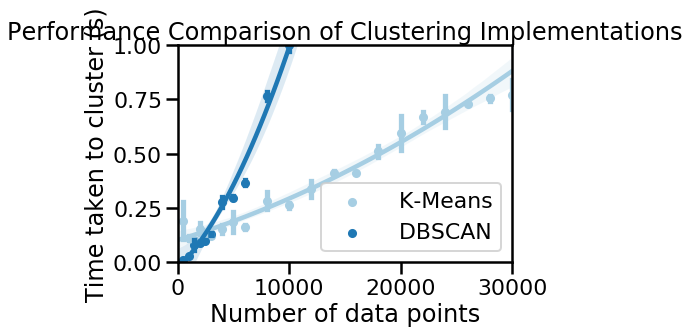

In [6]:
sns.regplot(x='x', y='y', data=k_means_data, order=2,
            label=' K-Means', x_estimator=np.mean)
sns.regplot(x='x', y='y', data=dbscan_data, order=2,
            label=' DBSCAN', x_estimator=np.mean)
plt.gca().axis([0, 30000, 0, 1])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of Clustering Implementations')
plt.legend()

In [7]:
agglomerative = sklearn.cluster.AgglomerativeClustering(10)
agg_data = benchmark_algorithm(dataset_sizes,
                               agglomerative.fit, (), {}, sample_size=4)


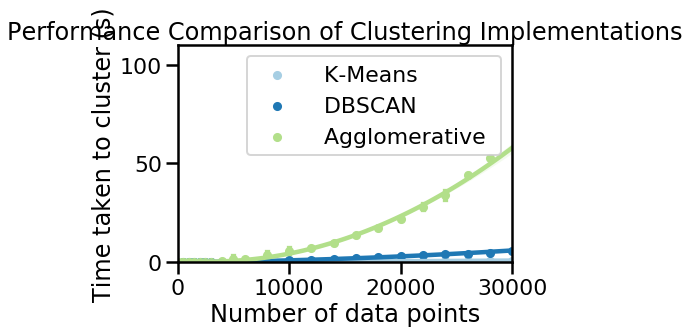

In [12]:
sns.regplot(x='x', y='y', data=k_means_data, order=2,
            label=' K-Means', x_estimator=np.mean)
sns.regplot(x='x', y='y', data=dbscan_data, order=2,
            label=' DBSCAN', x_estimator=np.mean)
sns.regplot(x='x', y='y', data=agg_data, order=2,
            label=' Agglomerative ', x_estimator=np.mean)
plt.gca().axis([0, 30000, 0, 110])
plt.gca().set_xlabel('Number of data points')
plt.gca().set_ylabel('Time taken to cluster (s)')
plt.title('Performance Comparison of Clustering Implementations')
plt.legend()

In [16]:
ward = sklearn.cluster.AgglomerativeClustering(n_clusters=10, affinity='euclidean', linkage='ward')
ward_data = benchmark_algorithm(dataset_sizes,
                               ward.fit, (), {}, sample_size=4)